In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from utils import *
from algo import *
import time

num_nodes: 200


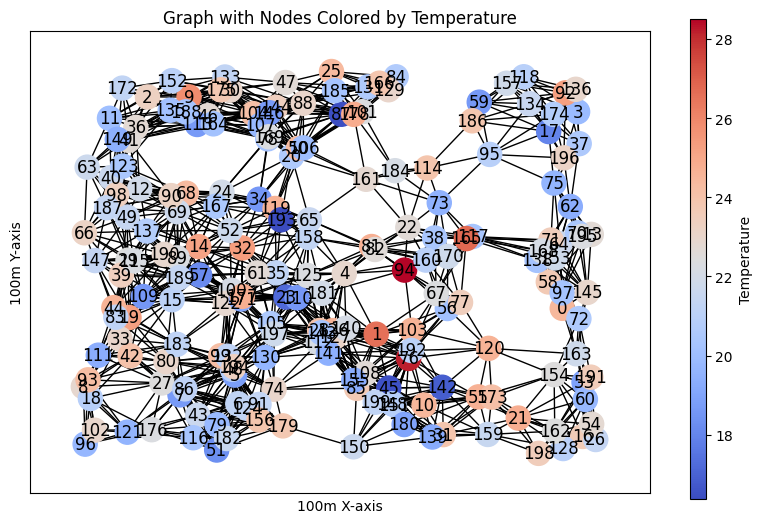

In [10]:

#intialise variables
required_probability=0.9999
num_nodes, G,A,pos,r_c=build_random_graph(200,required_probability,fix_num_nodes=True)
print("num_nodes:",num_nodes)

mean_temp=22
var_temp=5

#now to generate measured values for the temperature sensors ins some flat 3d field
temperature=generate_temp_field(num_nodes,var_temp,mean_temp)
tolerance=10**-12
c=0.4
# Set node colors based on temperatures

cmap = plt.cm.coolwarm

# Normalize temperature values to range [0, 1] for colormap
norm = plt.Normalize(vmin=np.min(temperature), vmax=np.max(temperature))

# Map temperature values to colors
node_colors = [cmap(norm(temp)) for temp in temperature]

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos=pos, node_color=node_colors, edge_color='black', with_labels=True)

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # empty array for the data range

# Set plot title and labels
plt.title('Graph with Nodes Colored by Temperature')
plt.xlabel('100m X-axis')
plt.ylabel('100m Y-axis')

# Add color bar to the plot
cbar_ax = plt.axes([0.95, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Temperature')

# Show the plot
plt.show()

Start1
Start2
Start3
End


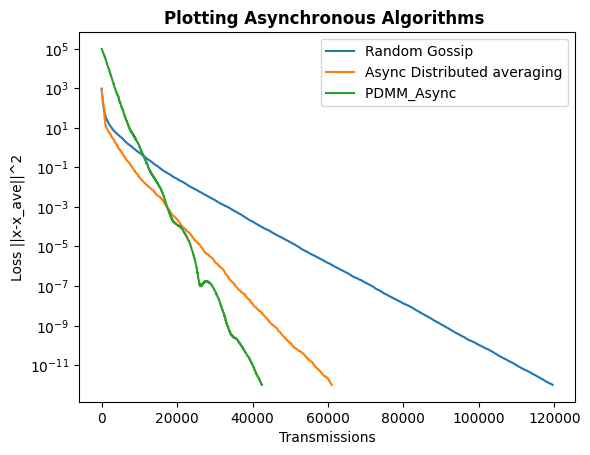

In [3]:

#plotting ideal algorithms
print("Start1")
loss_pdmm_async,trans_pdmm_async=PDMM_async(temperature.copy(),G.copy(),tolerance,c)
print("Start2")

loss_random,temperature_rand=random_gossip(temperature.copy(),A.copy(),tolerance)

print("Start3")
loss_async,trans_async,temperature_async=async_distr_averaging(temperature.copy(),A.copy(),tolerance)
print("End")
plot_log_convergence([loss_random,loss_async,loss_pdmm_async],[np.arange(1,loss_random.shape[0]+1),trans_async,trans_pdmm_async],['Random Gossip' ,'Async Distributed averaging','PDMM_Async '],"Plotting Asynchronous Algorithms ")


Started PDMM node change algorithm num_nodes  200
Started RG node change algorithm num_nodes  200
Finished algorithm num_nodes  101


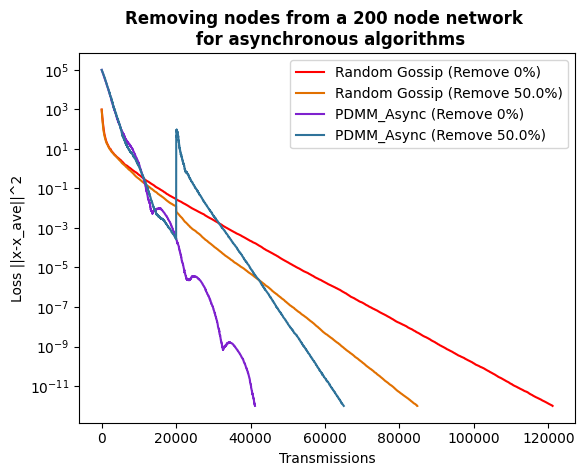

In [4]:
percentage_change=0.5
#removing of nodes  PDMM async
loss_pdmm_async,trans_pdmm_async=PDMM_async(temperature.copy(),G.copy(),tolerance,c)
loss_pdmm_async_node,trans_pdmm_async_node=PDMM_async_node_change(temperature.copy(),G.copy(),pos.copy(),25,10,r_c,tolerance,c,"remove_bulk",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)


loss_random,temperature_rand=random_gossip(temperature.copy(),A.copy(),tolerance)
loss_random_add,temperature_rand_add=random_gossip_node_change(temperature.copy(),G.copy(),pos.copy(),25,10,r_c,tolerance,"remove_bulk",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)
plot_log_convergence([loss_random,loss_random_add,loss_pdmm_async,loss_pdmm_async_node],[np.arange(1,loss_random.shape[0]+1),np.arange(1,loss_random_add.shape[0]+1),trans_pdmm_async,trans_pdmm_async_node],['Random Gossip (Remove 0%)',f'Random Gossip (Remove {percentage_change*100}%)','PDMM_Async (Remove 0%) ',f"PDMM_Async (Remove {percentage_change*100}%)"],f"Removing nodes from a {num_nodes} node network \n for asynchronous algorithms",["#ff0000", "#e17000","#7e22ce","#2f739a"])


Started PDMM node change algorithm num_nodes  200
Started RG node change algorithm num_nodes  200
Finished algorithm num_nodes  299


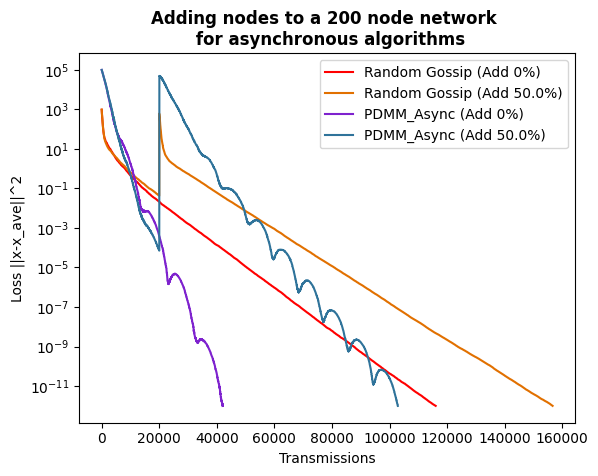

In [5]:
percentage_change=0.5
#Adding of nodes  PDMM async
loss_pdmm_async,trans_pdmm_async=PDMM_async(temperature.copy(),G.copy(),tolerance,c)
loss_pdmm_async_node,trans_pdmm_async_node=PDMM_async_node_change(temperature.copy(),G.copy(),pos.copy(),mean_temp,var_temp,r_c,tolerance,c,"add_bulk",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)


loss_random,temperature_rand=random_gossip(temperature.copy(),A.copy(),tolerance)
loss_random_add,temperature_rand_add=random_gossip_node_change(temperature.copy(),G.copy(),pos.copy(),mean_temp,var_temp,r_c,tolerance,"add_bulk",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)
plot_log_convergence([loss_random,loss_random_add,loss_pdmm_async,loss_pdmm_async_node],[np.arange(1,loss_random.shape[0]+1),np.arange(1,loss_random_add.shape[0]+1),trans_pdmm_async,trans_pdmm_async_node],['Random Gossip (Add 0%)',f'Random Gossip (Add {percentage_change*100}%)','PDMM_Async (Add 0%) ',f"PDMM_Async (Add {percentage_change*100}%)"],f"Adding nodes to a {num_nodes} node network \n for asynchronous algorithms",["#ff0000", "#e17000","#7e22ce","#2f739a"])


Started PDMM node change algorithm num_nodes  200
Started RG node change algorithm num_nodes  200


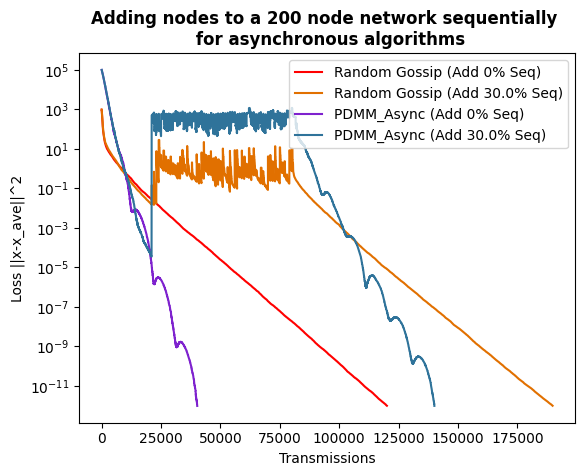

In [6]:
percentage_change=0.3
#Adding of nodes sequenctially PDMM async
loss_pdmm_async,trans_pdmm_async=PDMM_async(temperature.copy(),G.copy(),tolerance,c)
loss_pdmm_async_node,trans_pdmm_async_node=PDMM_async_node_change_seq(temperature.copy(),G.copy(),pos.copy(),mean_temp,var_temp,r_c,tolerance,c,"add",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)


loss_random,temperature_rand=random_gossip(temperature.copy(),A.copy(),tolerance)
loss_random_add,temperature_rand_add=random_gossip_node_change_seq(temperature.copy(),G.copy(),pos.copy(),mean_temp,var_temp,r_c,tolerance,"add",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)
plot_log_convergence([loss_random,loss_random_add,loss_pdmm_async,loss_pdmm_async_node],[np.arange(1,loss_random.shape[0]+1),np.arange(1,loss_random_add.shape[0]+1),trans_pdmm_async,trans_pdmm_async_node],['Random Gossip (Add 0% Seq)',f'Random Gossip (Add {percentage_change*100}% Seq)','PDMM_Async (Add 0% Seq) ',f"PDMM_Async (Add {percentage_change*100}% Seq)"],f"Adding nodes to a {num_nodes} node network sequentially \n for asynchronous algorithms",["#ff0000", "#e17000","#7e22ce","#2f739a"])


Started PDMM node change algorithm num_nodes  200
Started RG node change algorithm num_nodes  200


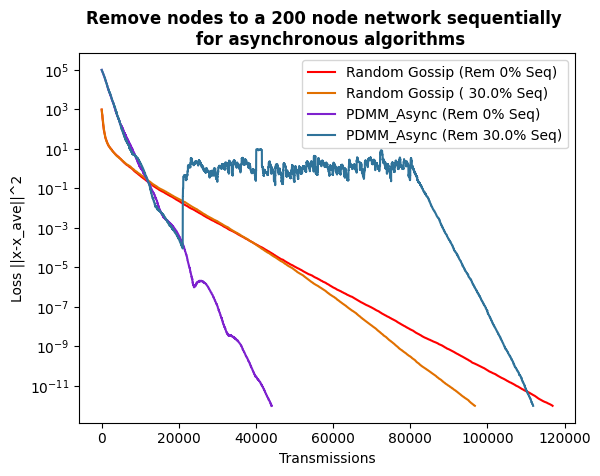

In [7]:
percentage_change=0.3
#Adding of nodes sequenctially PDMM async
loss_pdmm_async,trans_pdmm_async=PDMM_async(temperature.copy(),G.copy(),tolerance,c)
loss_pdmm_async_node,trans_pdmm_async_node=PDMM_async_node_change_seq(temperature.copy(),G.copy(),pos.copy(),mean_temp,var_temp,r_c,tolerance,c,"remove",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)


loss_random,temperature_rand=random_gossip(temperature.copy(),A.copy(),tolerance)
loss_random_add,temperature_rand_add=random_gossip_node_change_seq(temperature.copy(),G.copy(),pos.copy(),mean_temp,var_temp,r_c,tolerance,"remove",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)
plot_log_convergence([loss_random,loss_random_add,loss_pdmm_async,loss_pdmm_async_node],[np.arange(1,loss_random.shape[0]+1),np.arange(1,loss_random_add.shape[0]+1),trans_pdmm_async,trans_pdmm_async_node],['Random Gossip (Rem 0% Seq)',f'Random Gossip ( {percentage_change*100}% Seq)','PDMM_Async (Rem 0% Seq) ',f"PDMM_Async (Rem {percentage_change*100}% Seq)"],f"Remove nodes to a {num_nodes} node network sequentially \n for asynchronous algorithms",["#ff0000", "#e17000","#7e22ce","#2f739a"])


In [11]:
#sweep the c parameter
trans=[]
for c in np.arange(0.05,0.82,0.05):
    print(c)
    loss_pdmm_sync,trans_pdmm_sync=PDMM_sync(temperature,G,tolerance,c)    
    trans.append(trans_pdmm_sync[-1])


plt.plot(np.arange(0.05,0.82,0.05),trans)
plt.xlabel('c')
plt.ylabel('Transmissions')
plt.show()

0.05


In [8]:

num_nodes_Arr=[50,100,200,300]
rad_Arr=[0.157,0.157,0.157]
# num_nodes_Arr_Str=["Nodes:" +str(node)+"radius:"+str(rad_Arr[i]) for i,node in enumerate(num_nodes_Arr)]
tolerance=10**-12
c=0.4
loss_Arr=[]
trans_arr=[]
execution_time={}
for i,nodes in enumerate(num_nodes_Arr):
    print("Start",nodes)
    num_nodes, G,A,pos,r_c=build_random_graph(nodes,required_probability,fix_num_nodes=True)
    temperature=generate_temp_field(num_nodes,mean_temp,var_temp)

    start_time = time.time()
    loss_pdmm_async,trans_pdmm_async=PDMM_async(temperature.copy(),G.copy(),tolerance,c)
    end_time = time.time()
    execution_time[nodes,"pdmm"]= end_time - start_time

    print("Start2",nodes)
    start_time = time.time()
    loss_random,temperature_rand=random_gossip(temperature.copy(),A.copy(),tolerance)
    end_time = time.time()
    execution_time[nodes,"rg"]= end_time - start_time

    print("Start3",nodes)
    start_time = time.time()
    loss_async,trans_async,temperature_async=async_distr_averaging(temperature.copy(),A.copy(),tolerance)
    end_time = time.time()
    execution_time[nodes,"async"]= end_time - start_time

execution_time

Start 50
Start2 50
Start3 50
Start 100
Start2 100
Start3 100
Start 200
Start2 200
Start3 200
Start 300
Start2 300
Start3 300
